In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# EDA - Exploratory Data Analysis

In [2]:
#load data
train = pd.read_csv(os.path.join('data', 'train.csv'), index_col='id')
test = pd.read_csv(os.path.join('data', 'test.csv'), index_col='id')
sample_submission = pd.read_csv(os.path.join('data', 'sample_submission.csv'), index_col='id')

print(train.shape,test.shape,sample_submission.shape)

train.head()


(11504798, 11) (7669866, 10) (7669866, 1)


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [3]:
def generate_summary_statistics(data):

    summary_table = pd.DataFrame(data.dtypes, columns=['dtypes'])
    summary_table['Missing'] = data.isnull().sum()
    summary_table['Unique'] = data.nunique()
    summary_table['Count'] = data.count()
    summary_table['Duplicated'] = data.duplicated().sum()
    summary_table['zero_values'] = data.isin([0]).sum()
    
    
    return summary_table

In [4]:
generate_summary_statistics(train)

,dtypes,Missing,Unique,Count,Duplicated,zero_values
Gender,object,0,2,11504798,0,0
Age,int64,0,66,11504798,0,0
Driving_License,int64,0,2,11504798,0,22757
Region_Code,float64,0,54,11504798,0,59274
Previously_Insured,int64,0,2,11504798,0,6178116
Vehicle_Age,object,0,3,11504798,0,0
Vehicle_Damage,object,0,2,11504798,0,0
Annual_Premium,float64,0,51728,11504798,0,0
Policy_Sales_Channel,float64,0,152,11504798,0,0
Vintage,int64,0,290,11504798,0,0


In [5]:
generate_summary_statistics(test)

,dtypes,Missing,Unique,Count,Duplicated,zero_values
Gender,object,0,2,7669866,0,0
Age,int64,0,66,7669866,0,0
Driving_License,int64,0,2,7669866,0,15180
Region_Code,float64,0,53,7669866,0,39320
Previously_Insured,int64,0,2,7669866,0,4118126
Vehicle_Age,object,0,3,7669866,0,0
Vehicle_Damage,object,0,2,7669866,0,0
Annual_Premium,float64,0,50044,7669866,0,0
Policy_Sales_Channel,float64,0,151,7669866,0,0
Vintage,int64,0,290,7669866,0,0


## Age - Transformation

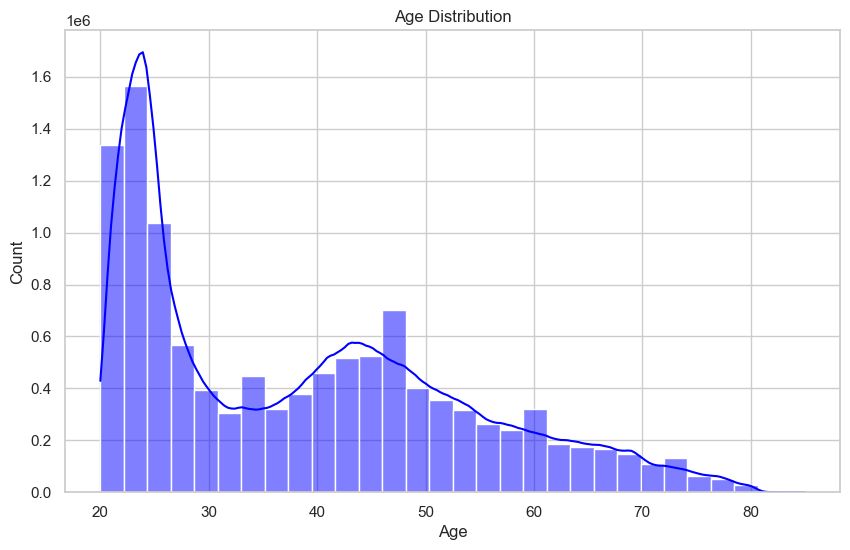

In [6]:
# age distribution
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.show()

The age distribution you've shared shows a bimodal pattern, indicating that there are two peaks in the data. This suggests that there may be two distinct groups within your dataset, based on age.

### Considerations for Binning

Binning, or transforming continuous variables into categorical variables, can be useful in certain situations:

1. **Simplification**: It simplifies the model, making it easier to interpret.
2. **Handling Non-linear Relationships**: It can help if the relationship between age and the target variable is non-linear.
3. **Dealing with Outliers**: Binning can reduce the impact of outliers.

### Binning Strategy

Given the distribution, you can create bins based on the observed peaks and troughs. For instance:

- **Young Adults**: 20-30
- **Middle-Aged Adults**: 31-40
- **Early Seniors**: 41-50
- **Late Seniors**: 51+

In [7]:
#Define bins and labels
bins = [20, 30, 40, 50, 90]
labels = ['Young Adults', 'Middle-Aged Adults', 'Early Seniors', 'Late Seniors']

# Apply binning
train['Age_Binned'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)
test['Age_Binned'] = pd.cut(test['Age'], bins=bins, labels=labels, right=False)

# Verify the binning
print(train['Age_Binned'].value_counts())
print(test['Age_Binned'].value_counts())

Age_Binned
Young Adults          4720573
Late Seniors          2741181
Early Seniors         2409458
Middle-Aged Adults    1633586
Name: count, dtype: int64
Age_Binned
Young Adults          3146291
Late Seniors          1828695
Early Seniors         1606684
Middle-Aged Adults    1088196
Name: count, dtype: int64


In [8]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Binned
id,,,,,,,,,,,,
0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0,Young Adults
1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1,Early Seniors
2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0,Young Adults
3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0,Middle-Aged Adults
4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0,Middle-Aged Adults


## Region - Transformation

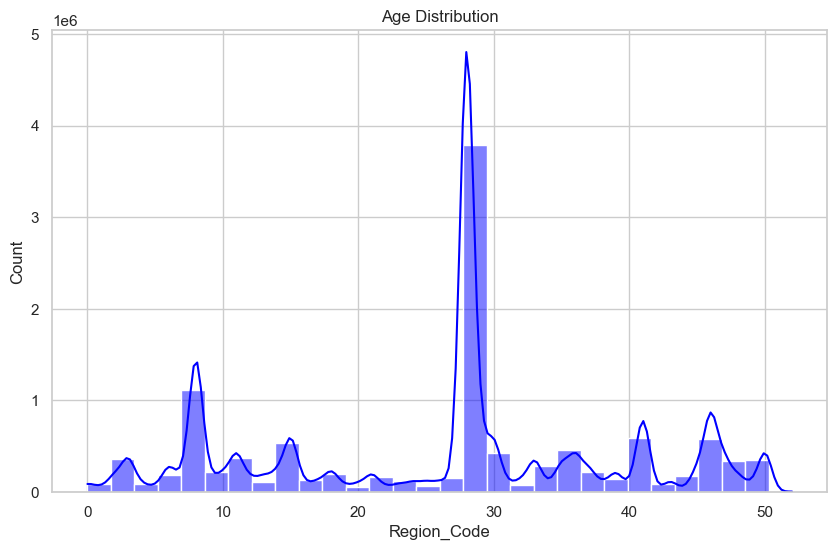

In [9]:
# age distribution
plt.figure(figsize=(10, 6))
sns.histplot(train['Region_Code'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.show()

The Region_Code variable has 53 unique values and exhibits a highly skewed distribution with a significant peak around a specific region code. Given this distribution, binning might be a useful strategy to consider, but it depends on several factors:

### Considerations for Binning

1. Distribution and Importance:

- **Skewed Distribution**: Since Region_Code is highly skewed, binning can help manage the skewness by grouping less frequent codes together.
- **Potential Loss of Information**: Binning can lead to a loss of granularity, which might be important if the region codes have significant predictive power.

2. Analysis of Predictive Power:

- **Correlation with Target Variable**: Analyze how Region_Code correlates with the target variable (Response). If certain regions have distinct patterns regarding the target, it might be beneficial to retain more detailed information.
- **Impact on Model Performance**: Experiment with both approaches (binning and not binning) to see which provides better model performance.

3. Dimensionality Reduction:

- **High Cardinality**: With 53 unique values, Region_Code could lead to high-dimensional data if one-hot encoding is used. Binning can help reduce the dimensionality.


### Binning Strategy

If you decide to bin Region_Code, you can:

1. **Group by Frequency**: Group less frequent region codes into an "Other" category.
2. **Domain Knowledge**: Use domain knowledge to group regions into meaningful bins.
3. **Clustering**: Use clustering algorithms (e.g., K-means) to group similar region codes based on other features.

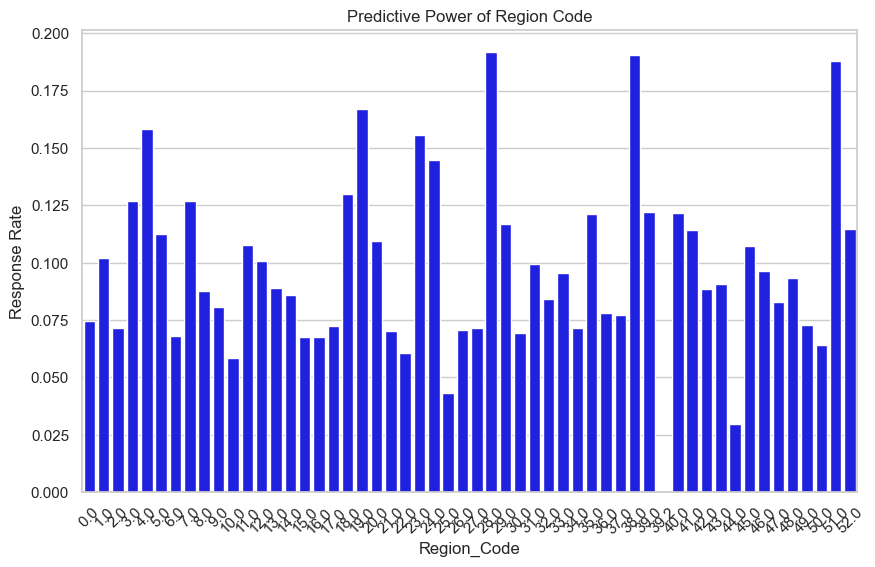

In [10]:
# predictive power of region code with respect to the target - Response
region_response = train.groupby('Region_Code')['Response'].mean().sort_values()

# Plot the predictive power of region code
plt.figure(figsize=(10, 6))
sns.barplot(x=region_response.index, y=region_response.values, color='blue')
plt.title('Predictive Power of Region Code')
plt.ylabel('Response Rate')
plt.xticks(rotation=45)
plt.show()

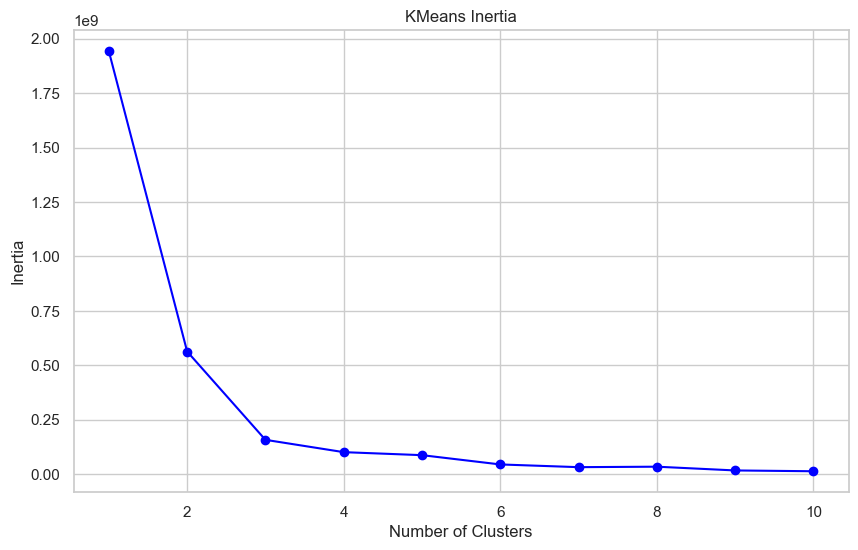

In [11]:
from sklearn.cluster import KMeans

# testing different k for kmeans
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0)
    kmeans.fit(train[['Region_Code']])
    inertia.append(kmeans.inertia_)
    
# Plot the inertia
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', color='blue')
plt.title('KMeans Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [12]:
# 3 clusters should be enough, creating clusters
k_clusters = 3

# Initialize KMeans
kmeans = KMeans(n_clusters=k_clusters, n_init='auto',random_state=0)

# Fit KMeans
train['Region_Code_Cluster'] = kmeans.fit_predict(train[['Region_Code']])
test['Region_Code_Cluster'] = kmeans.predict(test[['Region_Code']])
train['Region_Code_Cluster'] = train['Region_Code_Cluster'].astype('category')
test['Region_Code_Cluster'] = test['Region_Code_Cluster'].astype('category')

# Verify the binning
print(train['Region_Code_Cluster'].value_counts())
print(test['Region_Code_Cluster'].value_counts())

Region_Code_Cluster
1    5603613
0    3400812
2    2500373
Name: count, dtype: int64
Region_Code_Cluster
1    3734901
0    2266403
2    1668562
Name: count, dtype: int64
